In [41]:
using XLSX
using HTTP
using DataFrames

fileurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
response = HTTP.get(fileurl)
content = String(response.body)

excelfile = XLSX.readtable(IOBuffer(content), "Φύλλο1")

df = DataFrame(excelfile);

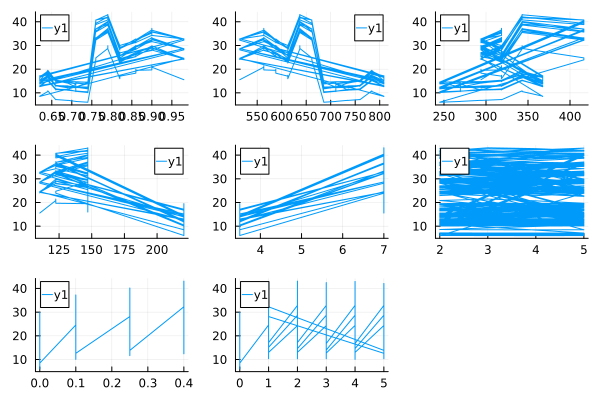

In [2]:

using Plots
plotslist = []
for i in 1:8
    p=plot(df[:,"X"*string(i)], df[:,"Y1"])
    push!(plotslist, p)
end
plot(plotslist...)


In [10]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,X1,0.764167,0.62,0.75,0.98,0,Any
2,X2,671.708,514.5,673.75,808.5,0,Any
3,X3,318.5,245.0,318.5,416.5,0,Any
4,X4,176.604,110.25,183.75,220.5,0,Any
5,X5,5.25,3.5,5.25,7.0,0,Any
6,X6,3.5,2,3.5,5,0,Any
7,X7,0.234375,0.0,0.25,0.4,0,Any
8,X8,2.8125,0,3.0,5,0,Any
9,Y1,22.3072,6.01,18.95,43.1,0,Any


In [43]:
using ScikitLearn
@sk_import linear_model: LinearRegression
@sk_import preprocessing: StandardScaler

X_mapper = DataFrameMapper([( [:X1, :X2, :X3, :X4, :X5, :X6, :X7, :X8], StandardScaler() ) ])
y_mapper = DataFrameMapper([( [:Y1], StandardScaler() )])
X = fit_transform!(X_mapper, copy(df))
y = fit_transform!(y_mapper, copy(df))
lr = fit!(LinearRegression(fit_intercept=true), X, y);
y_pred=predict(lr, X);

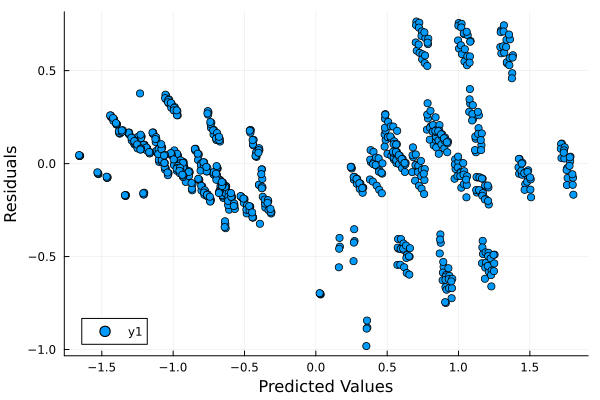

In [46]:
residuals = y - y_pred
scatter(y_pred, residuals, xlabel="Predicted Values", ylabel="Residuals")